In [1]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch

In [2]:
# Load the FinBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

In [3]:
# Create a sentiment analysis pipeline
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [8]:
# Sample economic texts
texts = [
    "$TSLA recalling pretty much every single model X @cnnbrk got to short that even at work you jump in money trade"
]

SENTIMENT SCORES

In [18]:
# Tokenize the texts
inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)

# Get the raw scores (logits) from the model
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Convert logits to sentiment scores
scores = torch.softmax(logits, dim=1)
print(scores[0][0])

tensor(0.0361)


In [21]:
# Print the results
for text in texts:
    print(f"Positive: {scores[0][0]:.4f}, Neutral: {scores[0][1]:.4f}, Negative: {scores[0][2]:.4f}\n")
# for text, score in zip(texts, scores):
#     # print(scores)
#     # print(f"Text: {text}")
#     print(f"Positive: {score[0]:.4f}, Neutral: {score[1]:.4f}, Negative: {score[2]:.4f}\n")

TypeError: can only concatenate str (not "Tensor") to str

SENTIMENT CLASSES

In [25]:
# Get the raw scores (logits) from the model
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Convert logits to sentiment scores
scores = torch.softmax(logits, dim=1)

# Define sentiment labels
labels = ['positive', 'neutral', 'negative']

# Determine the sentiment class
sentiment_classes = [labels[torch.argmax(score)] for score in scores]

In [26]:
# Print the results
for text, sentiment in zip(texts, sentiment_classes):
    print(f"Text: {text}\nSentiment: {sentiment}\n")

Text: Aviva, Friends Life top forecasts ahead of 5.6 billion pound merger
Sentiment: positive


In [41]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E:\\studies\\USJ FOT\\lecture\\Research\\CodeBase\\Method_Testing\\data.csv')
total_sentences = len(df)


def predict(text):
    # Ensure text is a string
    if pd.isna(text):
        return "No Text"  # Handle NaN values by returning a default label or similar indication
    text = str(text)  # Convert text to string in case it's not

    # Encode the input text, truncate if longer than 512 tokens
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    
    # Get logits from the model
    with torch.no_grad():
        output = model(**inputs)
        logits = output.logits
    
    # Convert logits to sentiment scores
    score = torch.softmax(logits, dim=1)

    # Define sentiment labels
    labels = ['positive', 'negative' , 'neutral']
    
    prediction_label = labels[torch.argmax(score)]    
    # progress = (i + 1) / total_sentences * 100
    # print(i)
    # print(f'Processing: {progress:.2f}%')
    # 
    return prediction_label



# Apply predictions
df['predicted_label'] = df['Sentence'].apply(predict)

# Save the updated DataFrame to a new CSV file
df.to_csv('fibnbert_sentiment_test.csv', index=False)

In [42]:
# Convert to numpy arrays (ensure dtype is consistent)
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
df['true_label_id'] = df['Sentiment'].map(label_mapping)
df['predicted_label_id'] = df['predicted_label'].map(label_mapping)

true_labels = df['true_label_id'].values.astype(int)
predicted_labels = df['predicted_label_id'].values.astype(int)

Accuracy: 0.7581307771311194
Precision: 0.7883580419766223
Recall: 0.7581307771311194
F1 Score: 0.7654873846129269


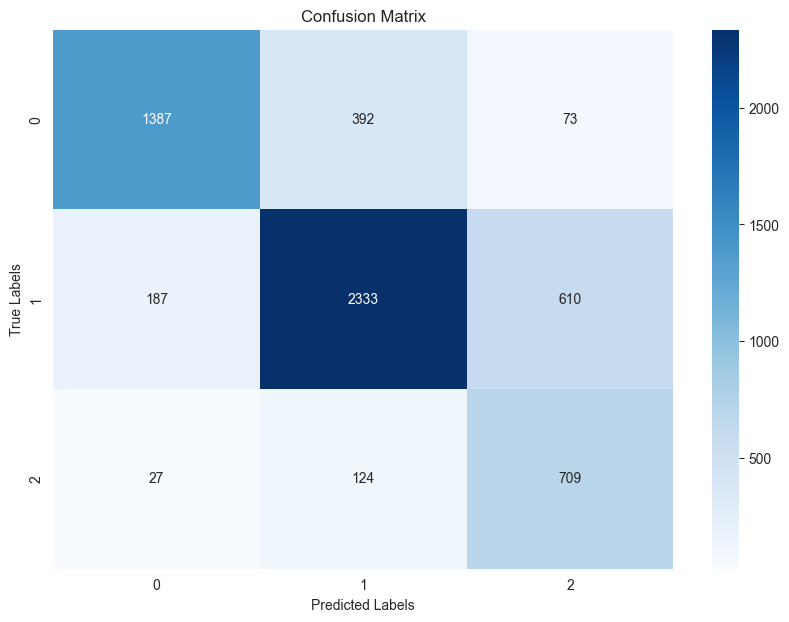

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()